Este notebook está basado en la guía **Getting started** de [pandas.pydata.org](https://pandas.pydata.org/docs/getting_started/index.html#getting-started)  y se utilizan los mismos gráficos y datos. 

Tutoriales más detallados se pueden encontrar en la [**Guía del usuario**](https://pandas.pydata.org/docs/user_guide/index.html)

El [**API**](https://pandas.pydata.org/docs/reference/index.html) detalla de cada función y sus parámetros 

In [ ]:
import pandas as pd

# ¿Qué tipo de datos manejan pandas?

## Dataframes
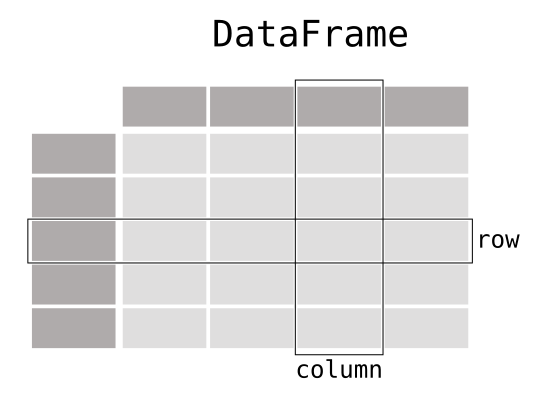

In [ ]:
df = pd.DataFrame({
    "Name": ["Braund, Mr. Owen Harris","Allen, Mr. William Henry", "Bonnell, Miss. Elizabeth"],
    "Age": [22, 35, 58],
    "Sex": ["male", "male", "female"]})

In [ ]:
df

## Series
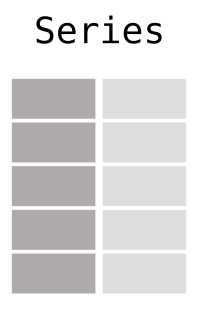

In [ ]:
df['Age'].values

In [ ]:
ages = pd.Series([22, 35, 58], name="Age")

In [ ]:
ages

## Hacer algo con un DataFrame o una Serie

In [ ]:
df["Age"].max()

In [ ]:
ages.max()

In [ ]:
df.describe()

# ¿Cómo puedo leer y escribir datos tabulares?

## Paseje del Titanic
Este tutorial utiliza el conjunto de datos del Titanic, almacenados como CSV. Los datos consisten en las siguientes columnas de datos:

- **PassengerId**: Id de cada pasajero.

- **Survived**: Esta característica tiene el valor 0 y 1. 0 para no superviviente y 1 para superviviente.

- **Pclass**: Hay 3 clases: Clase 1, Clase 2 y Clase 3.

- **Name**: Nombre del pasajero.

- **Sex**: Sexo del pasajero.

- **Age**: Edad del pasajero.

- **SibSp**: Indicación de que el pasajero tiene hermanos y cónyuge.

- **Parch**: Si el pasajero está solo o tiene familia.

- **Ticket**: Número de boleto del pasajero.

- **Fare**: Indicando la tarifa.

- **Cabin** La cabina del pasajero.

- **Embarked**: La categoría embarcada

enlace al fichero [**titanic.cvs**](https://github.com/pandas-dev/pandas/tree/master/doc/data/titanic.csv)


## ¿Cómo puedo leer y escribir datos tabulares?
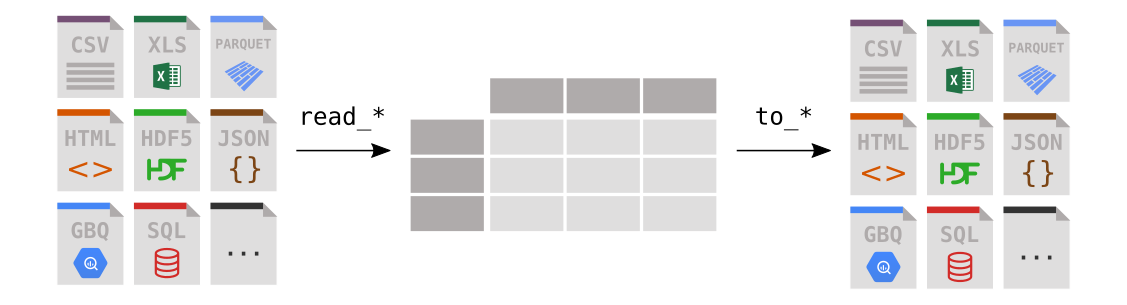

In [ ]:
titanic = pd.read_csv("titanic.csv")

In [ ]:
titanic.describe()

In [ ]:
titanic.head(8)

In [ ]:
titanic.dtypes

In [ ]:
titanic.to_excel('titanic.xlsx', sheet_name='passengers', index=False)

In [ ]:
titanic = pd.read_excel('titanic.xlsx', sheet_name='passengers')

In [ ]:
titanic.info()

In [ ]:
titanic.to_

# ¿Cómo selecciono un subconjunto de una tabla?

## ¿Cómo selecciono columnas de de una tabla?
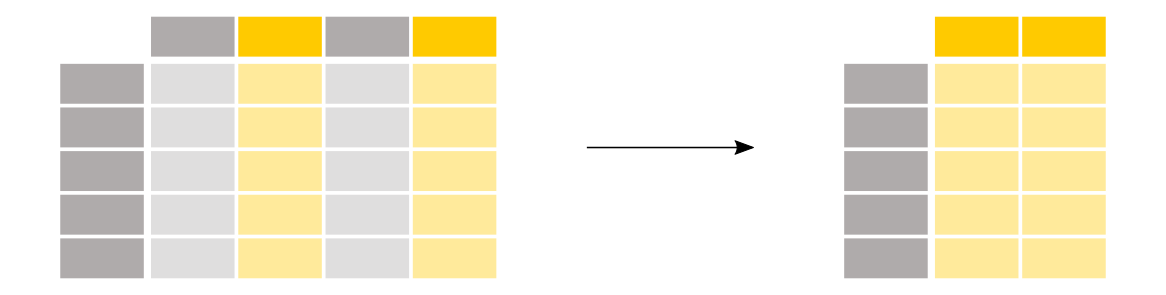

In [ ]:
titanic = pd.read_csv("titanic.csv")
titanic.head()

In [ ]:
ages = titanic["Age"]
ages.head()

In [ ]:
type(titanic["Age"])

In [ ]:
titanic["Age"].shape

In [ ]:
age_sex = titanic[["Age", "Sex"]]
age_sex.head()

## ¿Como filtro filas de una tabla?
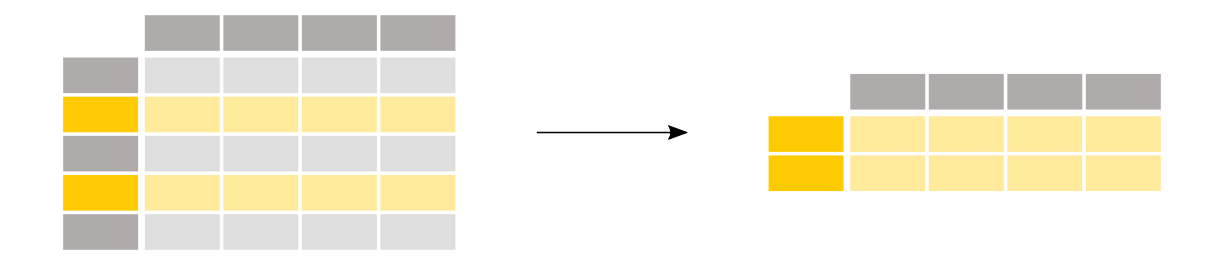

In [ ]:
above_35 = titanic[titanic["Age"] > 35]
above_35.head()

In [ ]:
titanic["Age"] > 35

In [ ]:
above_35.shape

In [ ]:
class_23 = titanic[titanic["Pclass"].isin([2, 3])]
class_23.head()

**Nota**

Cuando se combinan múltiples declaraciones condicionales, cada condición debe estar rodeada de paréntesis ().

Además, no se puede usar los operadores *or*/*and* pero es necesario usar el operador *|* para la o lógica y el operador *&* para la y lógica.

In [ ]:
class_23 = titanic[(titanic["Pclass"] == 2) | (titanic["Pclass"] == 3)]
class_23.head()


In [ ]:
age_no_na = titanic[titanic["Age"].notna()]
age_no_na.head()

## ¿Como filtro filas y columnas de una tabla?
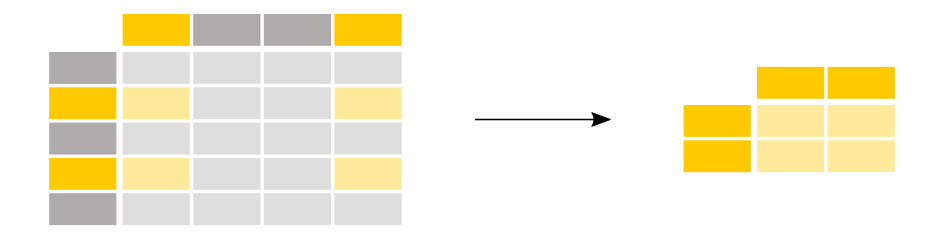

In [ ]:
adult_names = titanic.loc[titanic["Age"] > 35, "Name"]
adult_names.head()

En este caso, la selección de un subconjunto de filas y columnas se hace de una sola vez y el simple uso de paréntesis de selección [] ya no es suficiente. Los operadores de **loc**/**iloc** son necesarios delante de los paréntesis de selección **[ ]**. __Cuando se utiliza loc/iloc, la parte antes de la coma son las filas que se desean, y la parte después de la coma son las columnas que se desean seleccionar__.

Cuando utilice los nombres de las columnas, las etiquetas de las filas o una expresión de la condición, utilice el operador **loc** delante de los corchetes de selección []. Tanto para la parte anterior como para la posterior a la coma, puede utilizar una sola etiqueta, una lista de etiquetas, un trozo de etiquetas, una expresión condicional o dos puntos. *El uso de dos puntos especifica que desea seleccionar todas las filas o columnas*.


In [ ]:
titanic.iloc[9:25, 2:5]

In [ ]:
titanic.iloc[0:3, 3] = "anonymous"
titanic.head()

# ¿Cómo se crean gráficos en los pandas?
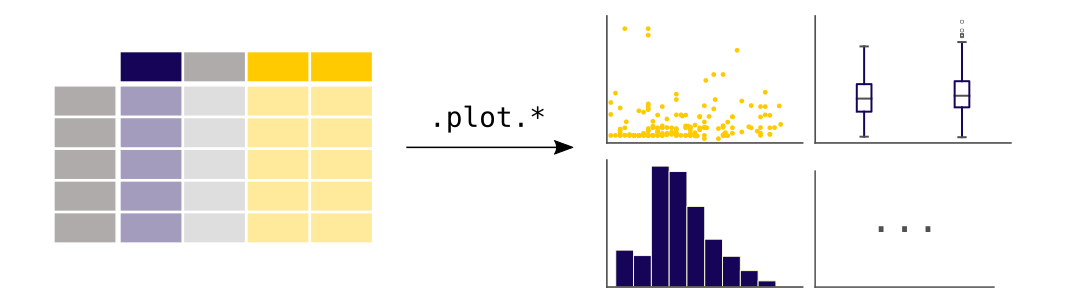


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
air_quality = pd.read_csv("air_quality_no2.csv",index_col=0, parse_dates=True)
air_quality.head()

El uso de los parámetros **index_col** y **parse_dates** de la función read_csv para definir la primera (0ª) columna como índice del DataFrame resultante y convertir las fechas de la columna en objetos **Timestamp**, respectivamente.

In [ ]:
air_quality.plot()

In [ ]:
air_quality["station_paris"].plot()

In [ ]:
air_quality.plot.scatter(x="station_london",
                         y="station_paris",
                         alpha=0.5)

In [ ]:
air_quality.plot.box()

In [ ]:
[method_name for method_name in dir(air_quality.plot) if not method_name.startswith("_")]

In [ ]:
axs = air_quality.plot.area(figsize=(12, 4), subplots=True)

In [ ]:
fig, axs = plt.subplots(figsize=(12, 4))
air_quality.plot.area(ax=axs)
axs.set_ylabel("NO$_2$ concentration")
fig.savefig("no2_concentrations.png")

# ¿Cómo crear nuevas columnas derivadas de las columnas existentes?
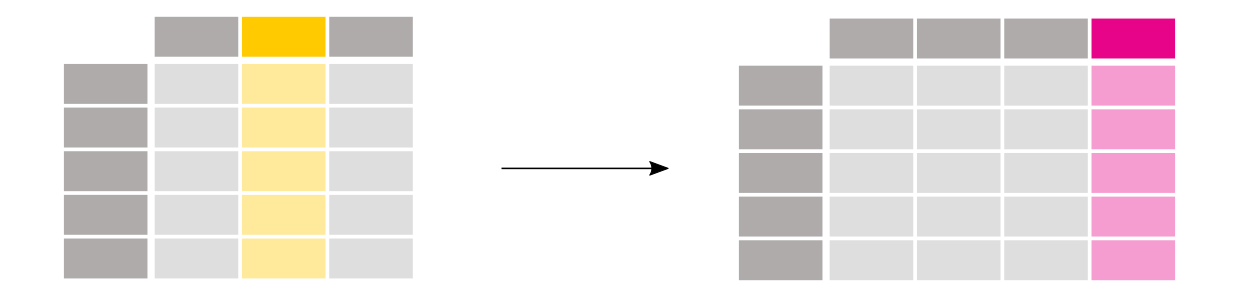

In [ ]:
# Calcular el valor de Londres por mg/m^3
# Si suponemos una temperatura de 25 grados centígrados y 
# una presión de 1013 hPa, el factor de conversión es 1,882
air_quality["london_mg_per_cubic"] = air_quality["station_london"] * 1.882
air_quality.head()

In [ ]:
air_quality["ratio_paris_antwerp"] = air_quality["station_paris"] / air_quality["station_antwerp"]
air_quality.head()

In [ ]:
air_quality_renamed = air_quality.rename(columns={"station_antwerp": "BETR801",
                                                  "station_paris": "FR04014",
                                                  "station_london": "London Westminster"})
air_quality_renamed.head()

In [ ]:
air_quality_renamed = air_quality_renamed.rename(columns=str.lower)
air_quality_renamed.head()

# ¿Cómo se calculan las estadísticas de resumen?

In [ ]:
titanic = pd.read_csv("titanic.csv")

## Agregar estadísticas
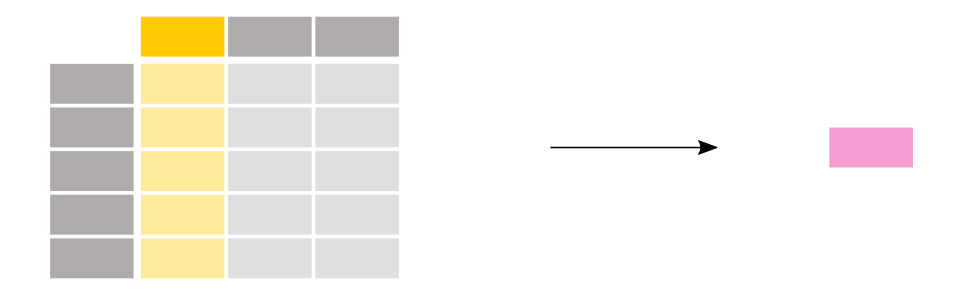

In [ ]:
titanic["Age"].mean()

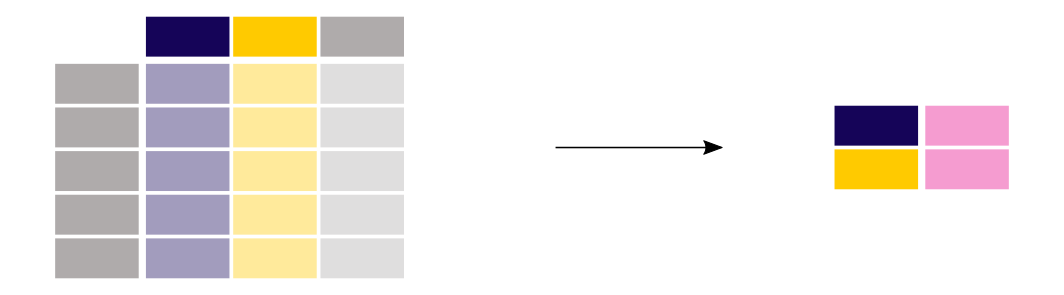

In [ ]:
titanic[["Age", "Fare"]].median()

In [ ]:
titanic[["Age", "Fare"]].describe()

En lugar de las estadísticas predefinidas, pueden definirse combinaciones específicas de estadísticas de agregación para determinadas columnas mediante el método **DataFrame.agg**:

In [ ]:
titanic.agg({'Age': ['min', 'max', 'median', 'skew'],
             'Fare': ['min', 'max', 'median', 'mean']})

## Estadísticas de agregación agrupadas por categoría
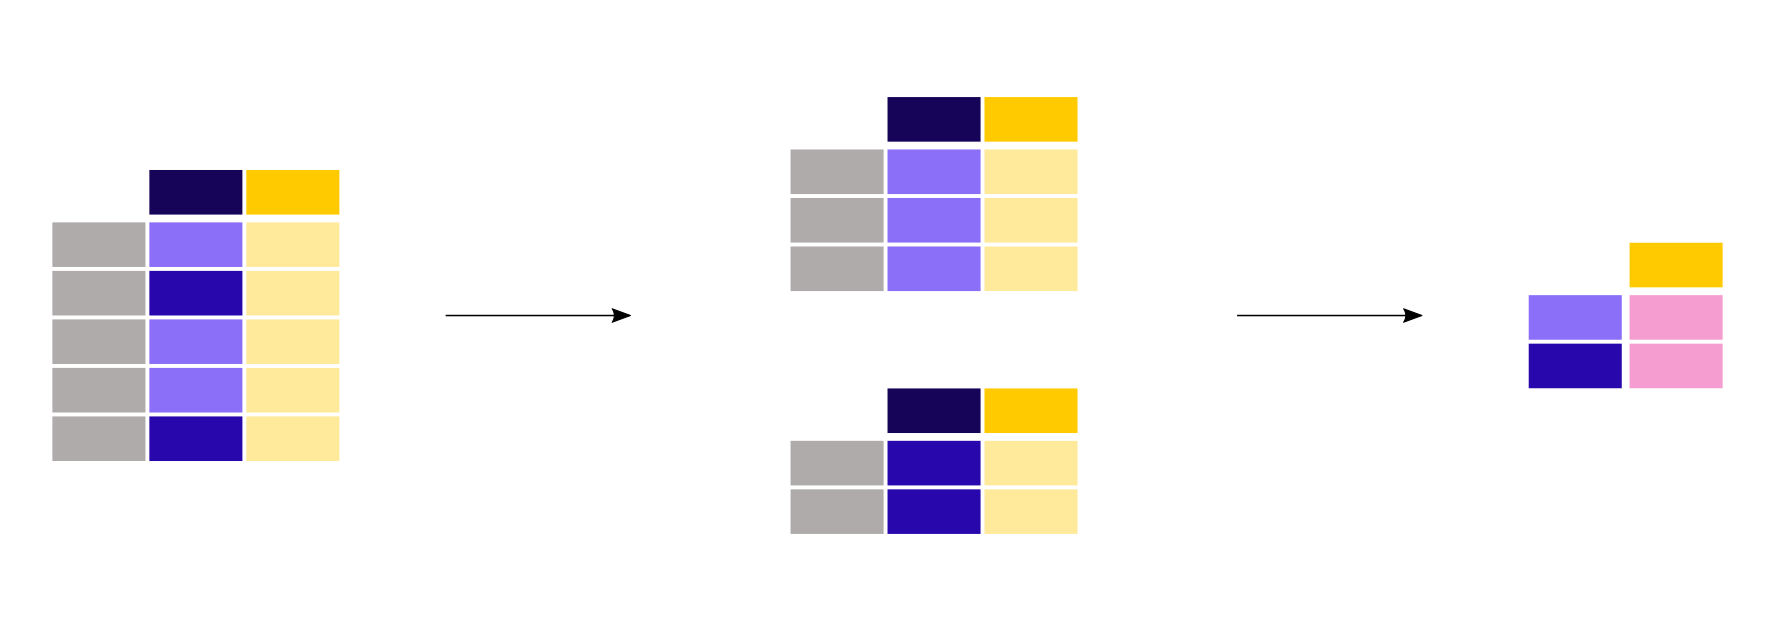

¿Cuál es la edad promedio de los pasajeros masculinos y femeninos del Titanic?

In [ ]:
titanic[["Sex", "Age"]].groupby("Sex").mean()

El cálculo de una estadística determinada (por ejemplo, la media de edad) para cada categoría de una columna (por ejemplo, hombre/mujer en la columna de Sexo) es un patrón común. Se utiliza el método **groupby** para apoyar este tipo de operaciones. 

En términos más generales, esto encaja en el patrón más general de dividir-aplicar-combinar:

- **Dividir** los datos en grupos

- **Aplicar** una función a cada grupo de forma independiente

- **Combinar** los resultados en una estructura de datos

Los pasos de aplicar y combinar se hacen típicamente juntos en los pandas.


In [ ]:
titanic.groupby("Sex").mean()

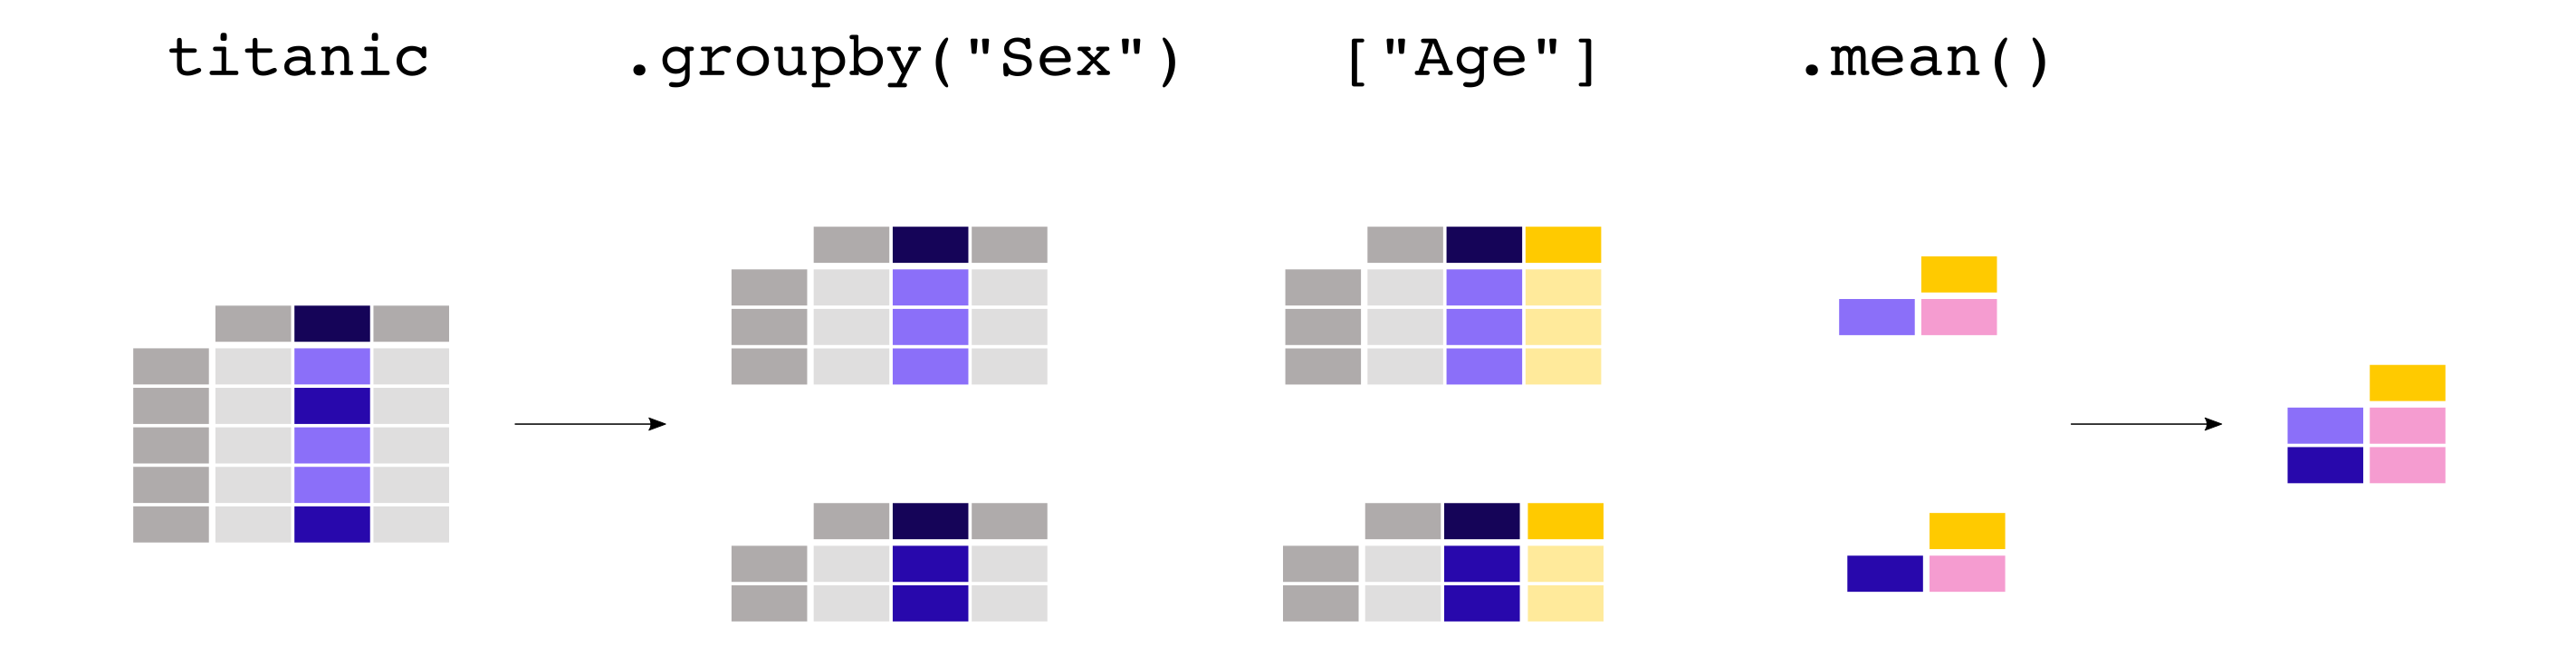

In [ ]:
titanic.groupby("Sex")["Age"].mean()

In [ ]:
titanic.groupby(["Sex", "Pclass"])["Fare"].mean()

## Contar el número de registros por categoría
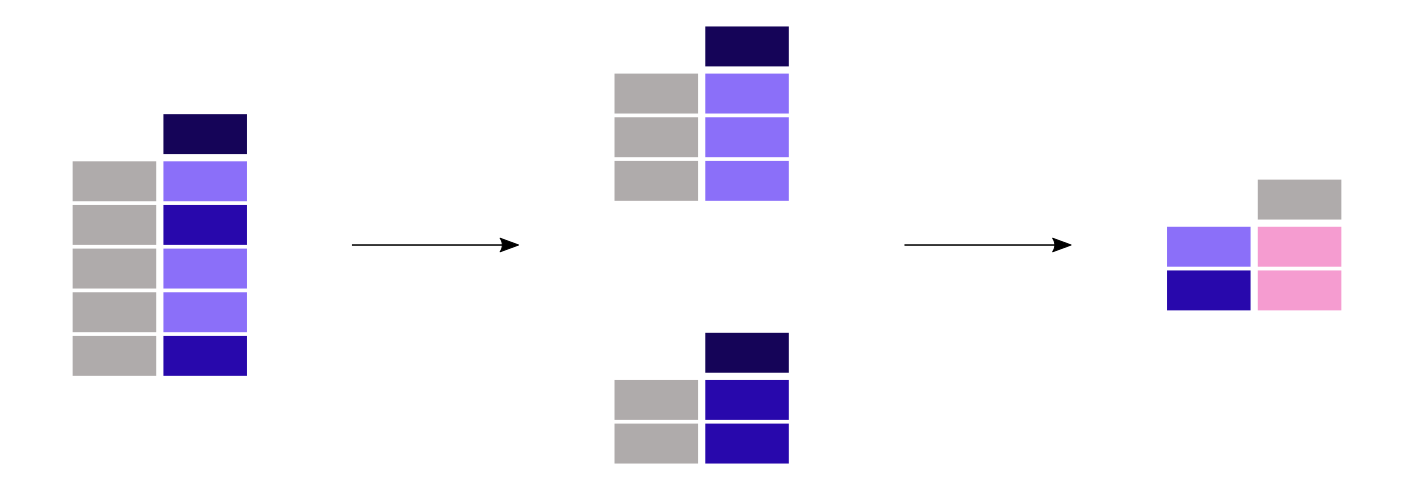

In [ ]:
 titanic["Pclass"].value_counts()

In [ ]:
titanic.groupby("Pclass")["Pclass"].count()

Tanto el **size** como **count** pueden ser usados en combinación con groupby. Mientras que el *size* incluye los valores de NaN y sólo proporciona el número de filas (tamaño de la tabla), el *count* excluye los valores que faltan. En el método **value_counts**, utilice el argumento *dropna* para incluir o excluir los valores NaN.

#¿Cómo remodelar la disposición de las tablas?

In [ ]:
titanic = pd.read_csv("titanic.csv")
air_quality = pd.read_csv("air_quality_long.csv",index_col="date.utc", parse_dates=True)

## Ordenar las filas de la tabla

In [ ]:
titanic.sort_values(by="Age").head()

In [ ]:
titanic.sort_values(by=['Pclass', 'Age'], ascending=False).head()

## Formato de tabla larga a ancha

In [ ]:
air_quality.head()

Usemos un pequeño subconjunto del conjunto de datos de calidad del aire. Nos centramos en los datos de NO2 y sólo utilizamos las dos primeras medidas de cada lugar (es decir, la cabeza de cada grupo). El subconjunto de datos se llamará no2_subconjunto

In [ ]:
no2 = air_quality[air_quality["parameter"] == "no2"]

In [ ]:
no2_subset = no2.sort_index().groupby(["location"]).head(2)

In [ ]:
no2_subset

Quiero los valores de las tres estaciones en columnas separadas, una al lado de la otra.
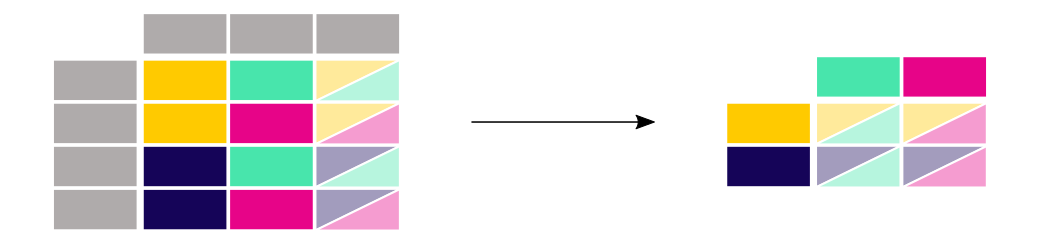

In [ ]:
no2_subset.pivot(columns="location", values="value")

La función **pivot()** es puramente de remodelación de los datos: *se requiere un único valor para cada combinación de índice/columna*.

In [ ]:
no2.head()

In [ ]:
no2.pivot(columns="location", values="value").plot()

Cuando el parámetro *index* no está definido, se utiliza el índice existente (etiquetas de fila).

## Pivot_table
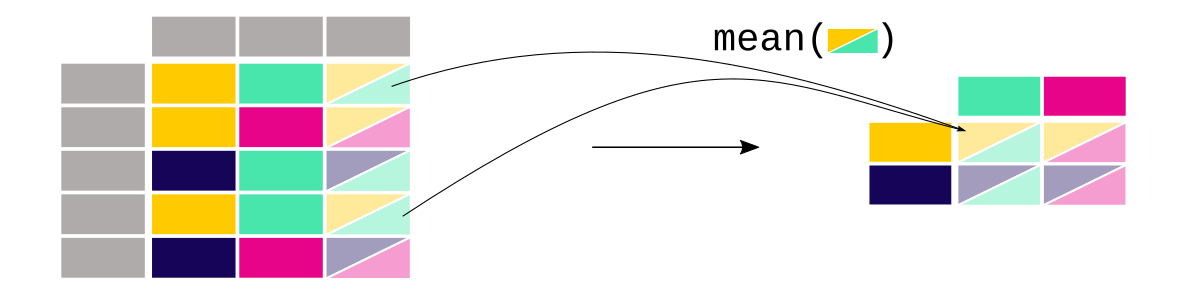

Quiero las concentraciones medias de NO2 y PM2.5 en cada una de las estaciones en forma de tabla

In [ ]:
air_quality.pivot_table(values="value", index="location",columns="parameter", aggfunc="mean")

En el caso de *pivot()*, los datos sólo se reordenan. Cuando es necesario agregar varios valores (en este caso concreto, los valores en diferentes pasos de tiempo) se puede utilizar **pivot_table()**, que proporciona una función de agregación (por ejemplo, la media) sobre cómo combinar estos valores.

La tabla pivotante es un concepto muy conocido en los programas de hojas de cálculo. Cuando también esté interesado en columnas de resumen para cada variable por separado, ponga el parámetro de *margin* en True:

In [ ]:
air_quality.pivot_table(values="value", index="location",
                        columns="parameter", aggfunc="mean",
                        margins=True)

pivot_table() está de hecho directamente ligado a groupby().

El mismo resultado se puede obtener agrupando tanto los parámetros como la ubicación:

In [ ]:
air_quality.groupby(["parameter", "location"]).mean()

# How to combine data from multiple tables?

Se pueden concatenar múltiples tablas tanto en lo que respecta a las columnas como a las filas y se proporcionan operaciones de unión/fusión como en las bases de datos para combinar múltiples tablas de datos.
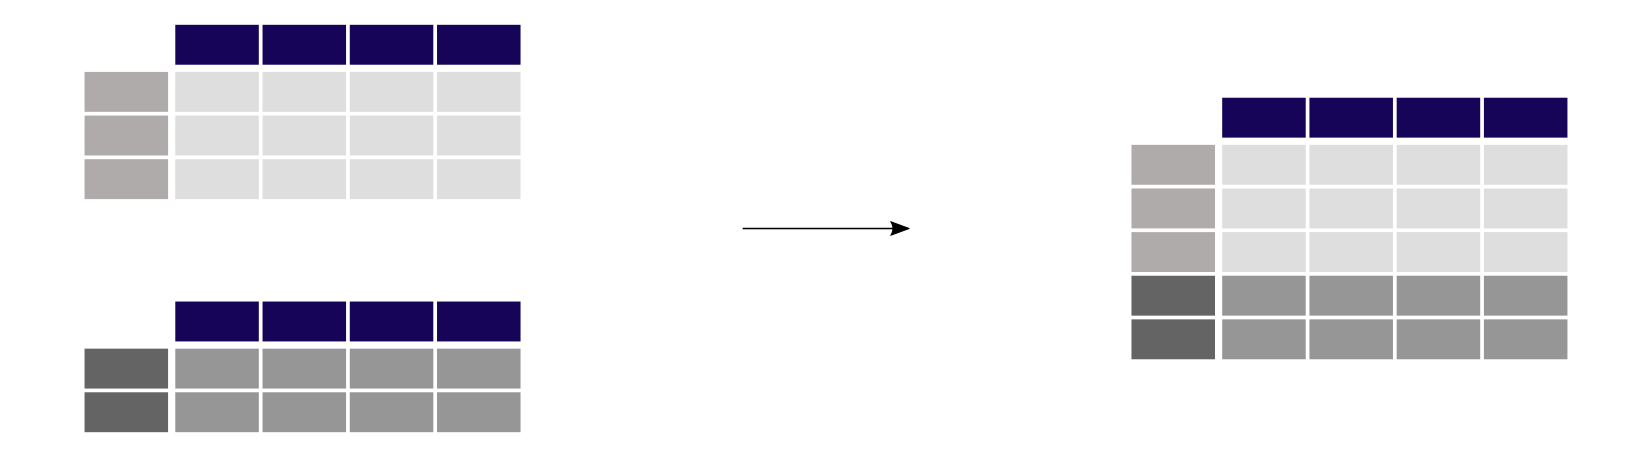

Para este tutorial se utilizan datos de calidad del aire sobre el NO2, puestos a disposición por openaq y descargados mediante el paquete py-openaq.

El conjunto de datos [**air_quality_no2_long.csv**](https://github.com/pandas-dev/pandas/blob/master/doc/data/air_quality_no2_long.csv) proporciona valores de NO2 para las estaciones de medición FR04014, BETR801 y London Westminster en París, Amberes y Londres respectivamente.



In [ ]:
air_quality_no2 = pd.read_csv("air_quality_no2_long.csv",parse_dates=True)
air_quality_no2 = air_quality_no2[["date.utc", "location","parameter", "value"]]
air_quality_no2.head()


Para este tutorial se utilizan datos de calidad del aire sobre las partículas de menos de 2,5 micrómetros, puestos a disposición por openaq y descargados mediante el paquete py-openaq.

El conjunto de datos [**air_quality_pm25_long.csv**](https://github.com/pandas-dev/pandas/blob/master/doc/data/air_quality_pm25_long.csv) proporciona los valores de PM25 para las estaciones de medición FR04014, BETR801 y London Westminster en París, Amberes y Londres respectivamente.

In [ ]:
air_quality_pm25 = pd.read_csv("air_quality_pm25_long.csv",parse_dates=True)
air_quality_pm25 = air_quality_pm25[["date.utc", "location","parameter", "value"]]
air_quality_pm25.head()

## Concatenando tablas 

In [ ]:
air_quality = pd.concat([air_quality_pm25, air_quality_no2], axis=0)
air_quality.head()

In [ ]:
print('Shape of the `air_quality_pm25` table: ', air_quality_pm25.shape)
print('Shape of the `air_quality_no2` table: ', air_quality_no2.shape)
print('Shape of the resulting `air_quality` table: ', air_quality.shape)

El argumento **axis** devolverá una serie de métodos de pandas que se pueden aplicar a lo largo de un eje. Un DataFrame tiene dos ejes correspondientes: el primero corre verticalmente hacia abajo a través de las filas (axis 0), y el segundo corre horizontalmente a través de las columnas (axis 1). La mayoría de las operaciones como la concatenación o las estadísticas de resumen se realizan por defecto a través de filas (axis 0), pero también pueden aplicarse a través de columnas.

In [ ]:
air_quality = air_quality.sort_values("date.utc")
air_quality.head()

En este ejemplo concreto, la columna *parameter* proporcionada por los datos garantiza que se pueda identificar cada uno de los cuadros originales. Esto no siempre es así. La función **concat** proporciona una solución conveniente con el argumento **keys**, añadiendo un índice de fila adicional (jerárquico)

In [ ]:
air_quality_ = pd.concat([air_quality_pm25, air_quality_no2],keys=["PM25", "NO2"])
air_quality_.head()

## Unir las tablas usando un identificador común.
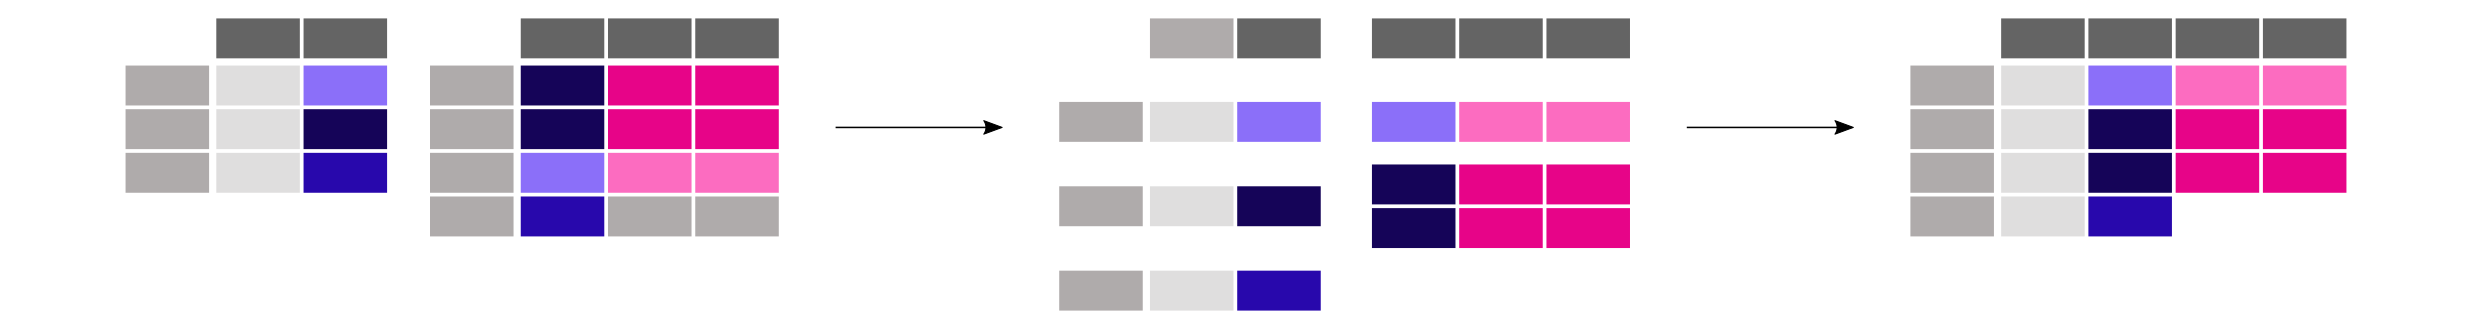

Añadimos las coordenadas de la estación, proporcionadas por la tabla de metadatos de la estación, a las filas correspondientes de la tabla de mediciones.

Las coordenadas de la estación de medición de la calidad del aire se almacenan en un archivo de datos [**air_quality_stations.csv**](https://github.com/pandas-dev/pandas/blob/master/doc/data/air_quality_stations.csv), que se descarga utilizando el paquete py-openaq.

In [ ]:
stations_coord = pd.read_csv("air_quality_stations.csv")
stations_coord.head()

In [ ]:
air_quality.head()

In [ ]:
air_quality = pd.merge(air_quality, stations_coord, how='left', on='location')
air_quality.head()

Utilizando la función **merge()**, para cada una de las filas de la tabla de calidad del aire, se añaden las coordenadas correspondientes de la tabla air_quality_stations_coord. Ambas tablas tienen en común la columna *location* que se utiliza como clave para combinar la información. Al elegir la unión *left*, sólo las ubicaciones disponibles en la tabla de calidad del aire (izquierda), es decir, FR04014, BETR801 y London Westminster, terminan en la tabla resultante. La función **merge** admite múltiples opciones de unión similares a las operaciones de tipo base de datos.

En el caso que la columna que queremos utilizar como llave para unir las tablas tuviera nombres diferentes, en la funcion **merge** podríamos utilizar los parámetros *left_on* y *right_on* para indicarla.

pd.merge(table_left, table_right,how='left', left_on='col_left', right_on='col_right')


# ¿Cómo manejar los datos de las series temporales?

In [ ]:
air_quality = pd.read_csv("air_quality_no2_long.csv")
air_quality = air_quality.rename(columns={"date.utc": "datetime"})
air_quality.head()

In [ ]:
air_quality.city.unique()

## Usando las propiedades del tipo **datetime** de pandas.

In [ ]:
air_quality["datetime"] = pd.to_datetime(air_quality["datetime"])
air_quality["datetime"]

En pandas llamamos a estos objetos **datetime** similares a datetime.datetime de la biblioteca estándar como **pandas.Timestamp**.

In [ ]:
air_quality["datetime"].min(), air_quality["datetime"].max()

In [ ]:
air_quality["datetime"].max() - air_quality["datetime"].min()

In [ ]:
air_quality["month"] = air_quality["datetime"].dt.month
air_quality.head()

Usando objetos de **Timestamp** para las fechas, muchas propiedades relacionadas con el tiempo son proporcionadas por los pandas. Por ejemplo el **month**, pero también el **year**, **weekofyear**, **quarter**,... Todas estas propiedades son accesibles por el dt .

¿Cuál es la concentración media de NO2 para cada día de la semana en cada uno de los lugares de medición?

In [ ]:
air_quality.groupby([air_quality["datetime"].dt.weekday, "location"])["value"].mean()

Traza el típico patrón de NO2 durante el día de nuestra serie de tiempo de todas las estaciones juntas. En otras palabras, ¿cuál es el valor promedio para cada hora del día?

In [ ]:
fig, axs = plt.subplots(figsize=(12, 4))
air_quality.groupby(air_quality["datetime"].dt.hour)["value"].mean().plot(kind='bar',rot=0,ax=axs)
plt.xlabel("Hour of the day"); 
plt.ylabel("$NO_2 (µg/m^3)$");


## Datetime como índice

In [ ]:
no_2 = air_quality.pivot(index="datetime", columns="location", values="value")
no_2.head()

In [ ]:
no_2.index.year, no_2.index.weekday

In [ ]:
no_2["2019-05-20":"2019-05-21"].plot();

## Volver a muestrear una serie de tiempo a otra frecuencia

Agregue los valores actuales de las series horarias al valor máximo mensual en cada una de las estaciones.

In [ ]:
monthly_max = no_2.resample("M").max()
monthly_max

Un método muy poderoso sobre los datos de las series temporales con un índice de fecha y hora, es **resample()** que proporcina la capacidad de remuestrear las series temporales a otra frecuencia (por ejemplo, convirtiendo los datos de segunda en datos de 5 minutos).

El método **resample()** es similar a una operación de **groupby** :

- proporciona una agrupación basada en el tiempo, utilizando una cadena (por ejemplo, M, 5H,...) que define la frecuencia objetivo

- requiere una función de agregación como media (**mean**), máximo (**max**),...

In [ ]:
monthly_max.index.freq

In [ ]:
no_2.resample("D").mean().plot(style="-o", figsize=(10, 5));

# ¿Cómo manipular los datos textuales?

In [ ]:
titanic["Name"].str.lower()

In [ ]:
titanic["Name"].str.split(",")

In [ ]:
titanic["Surname"] = titanic["Name"].str.split(",").str.get(0)
titanic["Surname"]

In [ ]:
titanic["Name"].str.contains("Countess")

In [ ]:
titanic[titanic["Name"].str.contains("Countess")]

In [ ]:
titanic["Name"].str.len()

In [ ]:
titanic["Name"].str.len().idxmax()

In [ ]:
titanic.loc[titanic["Name"].str.len().idxmax(), "Name"]

In [ ]:
titanic["Sex_short"] = titanic["Sex"].replace({"male": "M","female": "F"})
titanic["Sex_short"]

In [ ]:
titanic["Sex_short"] = titanic["Sex"].str.replace("female", "F")
print(titanic['Sex_short'].head(2))
titanic["Sex_short"] = titanic["Sex_short"].str.replace("male", "M")
print(titanic['Sex_short'].head(2))